<a href="https://colab.research.google.com/github/haaaram/MS-AIschool/blob/main/01.Python/CognitiveComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Computer Vision Image anlaysis

In [ ]:
import requests
from io import BytesIO
from PIL import Image

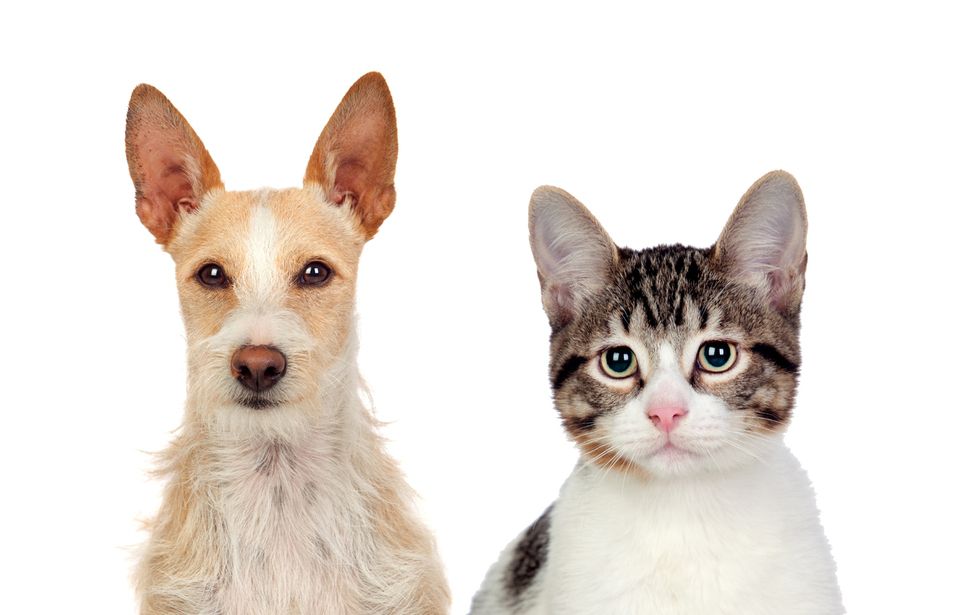

In [ ]:
image_url = 'https://img.hani.co.kr/imgdb/resize/2018/0202/00501366_20180202.JPG'
image = Image.open(BytesIO(requests.get(image_url).content))
#response = requests.get(image_url)
#img = BytesIO(response.content)
#image = Image.open(img)
image

In [ ]:
# 필요한 값들을 준비한다.
key = '7fd917145e074c5198c7bb1982b90a72'
endpoint = 'https://labuser13computervision2.cognitiveservices.azure.com/' + 'vision/v2.0/'

In [ ]:
analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'

In [ ]:
header = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [ ]:
response = requests.post(analyze_endpoint,
                        headers = header,
                        params = params,
                        json = data)

In [ ]:
result = response.json()
result

{'categories': [{'name': 'animal_cat', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '935838',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'indoor',
   'cat',
   'animal',
   'mammal',
   'brown',
   'dog',
   'camera',
   'small',
   'standing',
   'looking',
   'front',
   'table',
   'posing',
   'laying'],
  'captions': [{'text': 'a dog looking at the camera',
    'confidence': 0.9245400613811442}]},
 'requestId': '7a1ac883-60de-472a-abe0-d5da9d95438e',
 'metadata': {'height': 615, 'width': 970, 'format': 'Jpeg'}}

In [ ]:
result['description']['captions'][0]['text']

'a dog looking at the camera'

In [ ]:
# Object Detection

headers = {'Ocp-Apim-Subscription-Key' : key}
params = {}
data = {'url':image_url}

In [ ]:
response = requests.post(detect_endpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 98, 'y': 60, 'w': 346, 'h': 538},
   'object': 'Ibizan hound',
   'confidence': 0.541,
   'parent': {'object': 'hound',
    'confidence': 0.607,
    'parent': {'object': 'dog',
     'confidence': 0.85,
     'parent': {'object': 'mammal',
      'confidence': 0.908,
      'parent': {'object': 'animal', 'confidence': 0.909}}}}},
  {'rectangle': {'x': 479, 'y': 161, 'w': 360, 'h': 441},
   'object': 'cat',
   'confidence': 0.874,
   'parent': {'object': 'mammal',
    'confidence': 0.902,
    'parent': {'object': 'animal', 'confidence': 0.902}}}],
 'requestId': '18300d6a-adcc-49f8-beb0-d6905dd4be98',
 'metadata': {'height': 615, 'width': 970, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [ ]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y), (x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

In [ ]:
MakeBox(result)

{'x': 98, 'y': 60, 'w': 346, 'h': 538}
{'x': 479, 'y': 161, 'w': 360, 'h': 441}


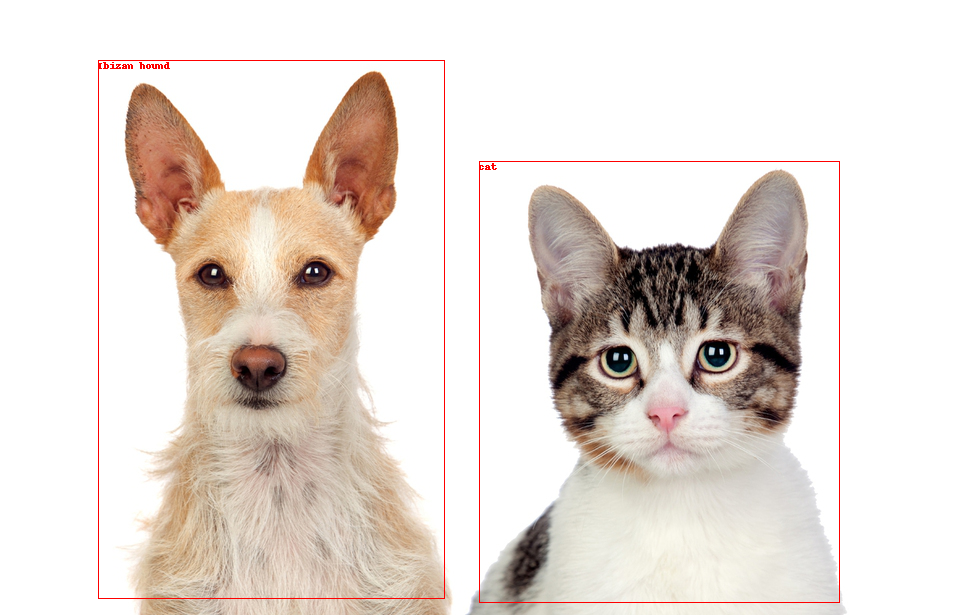

In [ ]:
image

In [ ]:
ocr_endpoint = endpoint + 'ocr'

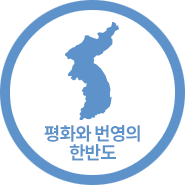

In [ ]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'language':'ko', 'detectOrientation':'true'} #unk를 쓰면 auto detect가 된다.
data = {'url':image_url}

In [ ]:
response = requests.post(ocr_endpoint,
                         headers=headers,
                         params=params,
                         json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [ ]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word['text'])

평화와
번영의
한반도
